<a href="https://colab.research.google.com/github/paulorc-silva/Conteudos-Sobre-Dados--Impacta/blob/master/Aulas_IA_Processamento_Linguagem_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de linguagem natural


## Importando as bibliotecas

In [ ]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import nltk
import re
import urllib.request

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Testando a biblioteca nltk

In [ ]:
# Primeiro exemplo
example_string = """ Este é o primeiro exemplo para testar uma NLP.
A ideia é verificar o poder de uma NLP,
Vamos ver qual o poder deste pacote em python."""

In [ ]:
# Mostra os parágrafos que foram escritos anteriormente.
sent_tokenize(example_string)

[' Este é o primeiro exemplo para testar uma NLP.',
 'A ideia é verificar o poder de uma NLP,\nVamos ver qual o poder deste pacote em python.']

In [ ]:
# Lista de strings que o NLTK considera palavras.
# Repare que todas as palavras que inserimos nos três parágrafos foram classificados corretamente como palavras.
# No entanto, repare que a vírgula (,) e o ponto (.) também foram classificadas como palavras.

word_tokenize(example_string)

['Este',
 'é',
 'o',
 'primeiro',
 'exemplo',
 'para',
 'testar',
 'uma',
 'NLP',
 '.',
 'A',
 'ideia',
 'é',
 'verificar',
 'o',
 'poder',
 'de',
 'uma',
 'NLP',
 ',',
 'Vamos',
 'ver',
 'qual',
 'o',
 'poder',
 'deste',
 'pacote',
 'em',
 'python',
 '.']

## Filtrando palavras de parada

In [ ]:
# Uma lista de palavras (Frase)
worf_quote = 'Sir, I protest. I am not a merry man!'

In [ ]:
# O próximo passo é criar um conjunto de palavras de parada para filtrar words_in_quote.
words_in_quote = word_tokenize(worf_quote)
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [ ]:
# Se concentrar nas palavras de parada em "inglês":
stop_words = set(stopwords.words('english'))

In [ ]:
# Crie uma lista vazia para conter as palavras que passam pelo filtro:
filtered_list = []

In [ ]:
# Foi criado uma lista vazia, chamada filtered_list, para conter todas as palavras em words_in_quote
# que não são palavras de parada.
# Agora você pode usar stop_words para filtrar words_in_quote:
for word in words_in_quote:
      if word.casefold() not in stop_words:
        filtered_list.append(word)

In [ ]:
# Dê uma olhada nas palavras que acabaram na filtered_list:
filtered_list

# Repare que algumas palavras não aparecem agora.
# Foram retiradas algumas palavras que acaba afetando o significado da frase.
# Por exemplo, foi filtrado algumas palavras como 'I', 'am' e 'a', mas também filtrou 'not'.

## Outro exemplo

In [ ]:
worf_quote = "God can do infinitely more than we ask or think. Don't you think."

In [ ]:
words_in_quote = word_tokenize(worf_quote)
words_in_quote

['God',
 'can',
 'do',
 'infinitely',
 'more',
 'than',
 'we',
 'ask',
 'or',
 'think',
 '.',
 'Do',
 "n't",
 'you',
 'think',
 '.']

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
filtered_list = []

In [ ]:
for word in words_in_quote:
      if word.casefold() not in stop_words:
        filtered_list.append(word)

In [ ]:
filtered_list

['God', 'infinitely', 'ask', 'think', '.', "n't", 'think', '.']

## Identificando sentimentos em frases com TextBlob

In [ ]:
# Mostra um sentimento positivo na frase
res = TextBlob('This movie is amazingly directed')
print(res.sentiment.polarity)

0.6000000000000001


In [ ]:
# Mostra um sentimento negativo na frase
res = TextBlob('This movie is badly directed.')
print(res.sentiment.polarity)

-0.6999999999999998


In [ ]:
# Mostra um sentimento negativo na frase e não altera o "valor do sentimento".
res = TextBlob('This movie is completely badly directed.')
print(res.sentiment.polarity)

-0.6999999999999998


In [ ]:
# Neste exemplo, a pontuação de polaridade é 0.6
# Polaridade seria um "peso" sobre o que está sendo estudado. Nesse caso, 60% de chances dele estar falando bem
res = TextBlob('This movie is amazingly directed.')
print(res.sentiment.polarity)

0.6000000000000001


In [ ]:
# Neste exemplo, a pontuação de polaridade é 0,2
res = TextBlob('This movie is very well directed.')
print(res.sentiment.polarity)

0.2


In [ ]:
# Neste exemplo, a pontuação de polaridade é 1,0
res = TextBlob('This is the best Face Recognition at this price.')
print(res.sentiment.polarity)

1.0


In [ ]:
# Neste exemplo, a pontuação de polaridade é 1,0. No entanto, esta frase justamente o contrário da frase anterior.
# Neste caso, a análise de sentimento feita pela biblioteca TextBlob dá maior peso para a palavra best.
res = TextBlob('This is not the best Face Recognition at this price.')
print(res.sentiment.polarity)

1.0


## Corretor ortográfico

In [ ]:
segunda_frase = TextBlob('I am not in denger. I am the dyangr.')
segunda_frase.correct()

TextBlob("I am not in danger. I am the danger.")

In [ ]:
frase = TextBlob('I am hurring quickly. Because I am a litli late.')
frase.correct()

TextBlob("I am hurrying quickly. Because I am a little late.")

In [ ]:
# Ordene frequências usando Textblob

betty = TextBlob('Betty Botter bought some butter. But she said the Butter’s bitter. If I put it in my batter, it will make my batter bitter. But a bit of better butter will make my batter better.')
betty.word_counts['butter']

3

In [ ]:
betty = TextBlob('Betty Botter bought some butter. But she said the Butter’s bitter. If I put it in my batter, it will make my batter bitter. But a bit of better butter will make my batter better.')
betty.word_counts['Betty']

0

In [ ]:
betty = TextBlob("I've been in united states in 2015. How ever, my wife have been in Europe.")
betty.word_counts['have']

1

## Analisando dados da web com Web Scrapping

In [ ]:
response = urllib.request.urlopen('https://pt.wikipedia.org/wiki/SpaceX')
html = response.read()

In [ ]:
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
text = text.lower()
text

'spacex – wikipédia, a enciclopédia livredocument.documentelement.classname="client-js";rlconf={"wgbreakframes":false,"wgseparatortransformtable":[",\\t.","\xa0\\t,"],"wgdigittransformtable":["",""],"wgdefaultdateformat":"dmy","wgmonthnames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgrequestid":"c2d79086-0fce-4d94-ab79-074818dc47fc","wgcspnonce":false,"wgcanonicalnamespace":"","wgcanonicalspecialpagename":false,"wgnamespacenumber":0,"wgpagename":"spacex","wgtitle":"spacex","wgcurrevisionid":64377274,"wgrevisionid":64377274,"wgarticleid":912214,"wgisarticle":true,"wgisredirect":false,"wgaction":"view","wgusername":null,"wgusergroups":["*"],"wgcategories":["!predefinição webarchive archiveis links","!cs1 inglês-fontes em língua (en)","!artigos com ligações externas inativas","!cs1 manut: bot: estado original-url desconhecido","!artigos bons na wikipédia em inglês","!artigos bons na wikipédia em ucraniano",\n"!w

In [ ]:
# "Limpando" todo o texto, retirando acentos, barras, números, etc, usando o módulo re.
# Será feito uma limpeza básica.
text = re.sub(r'[^\w\s\´]', ' ', text)
text = re.sub('\d+', ' ', text)
text

'spacex   wikipédia  a enciclopédia livredocument documentelement classname  client js  rlconf   wgbreakframes  false  wgseparatortransformtable      t    \xa0 t     wgdigittransformtable           wgdefaultdateformat   dmy   wgmonthnames       janeiro   fevereiro   março   abril   maio   junho   julho   agosto   setembro   outubro   novembro   dezembro    wgrequestid   c d   fce  d  ab   dc fc   wgcspnonce  false  wgcanonicalnamespace      wgcanonicalspecialpagename  false  wgnamespacenumber     wgpagename   spacex   wgtitle   spacex   wgcurrevisionid     wgrevisionid     wgarticleid     wgisarticle  true  wgisredirect  false  wgaction   view   wgusername  null  wgusergroups         wgcategories     predefinição webarchive archiveis links    cs  inglês fontes em língua  en     artigos com ligações externas inativas    cs  manut  bot  estado original url desconhecido    artigos bons na wikipédia em inglês    artigos bons na wikipédia em ucraniano  \n  website oficial diferente no wikid

In [ ]:
# Estruturando as palavras em uma lista.
tokens = [t for t in text.split()]
tokens

['spacex',
 'wikipédia',
 'a',
 'enciclopédia',
 'livredocument',
 'documentelement',
 'classname',
 'client',
 'js',
 'rlconf',
 'wgbreakframes',
 'false',
 'wgseparatortransformtable',
 't',
 't',
 'wgdigittransformtable',
 'wgdefaultdateformat',
 'dmy',
 'wgmonthnames',
 'janeiro',
 'fevereiro',
 'março',
 'abril',
 'maio',
 'junho',
 'julho',
 'agosto',
 'setembro',
 'outubro',
 'novembro',
 'dezembro',
 'wgrequestid',
 'c',
 'd',
 'fce',
 'd',
 'ab',
 'dc',
 'fc',
 'wgcspnonce',
 'false',
 'wgcanonicalnamespace',
 'wgcanonicalspecialpagename',
 'false',
 'wgnamespacenumber',
 'wgpagename',
 'spacex',
 'wgtitle',
 'spacex',
 'wgcurrevisionid',
 'wgrevisionid',
 'wgarticleid',
 'wgisarticle',
 'true',
 'wgisredirect',
 'false',
 'wgaction',
 'view',
 'wgusername',
 'null',
 'wgusergroups',
 'wgcategories',
 'predefinição',
 'webarchive',
 'archiveis',
 'links',
 'cs',
 'inglês',
 'fontes',
 'em',
 'língua',
 'en',
 'artigos',
 'com',
 'ligações',
 'externas',
 'inativas',
 'cs',
 'm

In [ ]:
# Com a lista é possível eliminar as "stopwords" e, neste caso, alguns códigos
# grandes que foram limpos do site, junto com o conteúdo textual.
stopwords = nltk.corpus.stopwords.words('portuguese')
clean_tokens = []

for token in tokens:
    if token not in stopwords and len(token) < 20:
        clean_tokens.append(token)

In [ ]:
# Usando NLTK para encontrar a frequência de palavras no texto.
freq = nltk.FreqDist(clean_tokens)
freq

FreqDist({'spacex': 340, 'consultado': 212, 'cópia': 171, 'arquivada': 171, 'março': 167, 'the': 103, 'falcon': 94, 'lançamento': 94, 'maio': 86, 's': 79, ...})

In [ ]:
# Visualizando o conteúdo de freq.
for key, val in freq.items():
    print(str(key) + ':' + str(val))

spacex:340
wikipédia:7
enciclopédia:2
livredocument:1
documentelement:1
classname:1
client:2
js:2
rlconf:1
wgbreakframes:1
false:8
t:7
wgdefaultdateformat:1
dmy:1
wgmonthnames:1
janeiro:45
fevereiro:72
março:167
abril:53
maio:86
junho:61
julho:37
agosto:38
setembro:33
outubro:20
novembro:35
dezembro:61
wgrequestid:1
c:15
d:13
fce:1
ab:11
dc:1
fc:1
wgcspnonce:1
wgnamespacenumber:1
wgpagename:1
wgtitle:1
wgcurrevisionid:1
wgrevisionid:1
wgarticleid:1
wgisarticle:1
true:13
wgisredirect:1
wgaction:1
view:1
wgusername:1
null:1
wgusergroups:1
wgcategories:1
predefinição:11
webarchive:2
archiveis:2
links:2
cs:5
inglês:21
fontes:2
língua:2
en:2
artigos:10
ligações:4
externas:3
inativas:2
manut:3
bot:3
estado:4
original:5
url:7
desconhecido:3
bons:4
ucraniano:2
website:2
oficial:3
diferente:2
wikidata:6
wikipedia:8
páginas:3
usam:2
hiperligações:2
mágicas:2
isbn:11
elon:50
musk:71
pt:7
wgpagecontentmodel:1
wikitext:1
wgrelevantpagename:1
wgrelevantarticleid:1
wgrestrictionedit:1
wgrestrictionmo

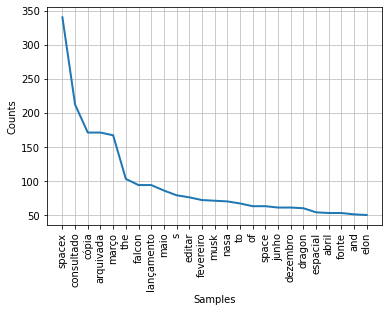

In [ ]:
# Quantidade de palavras apresentada em um gráfico.
freq.plot(25, cumulative=False)